In [1]:
import aocd
import re
import numpy as np
import matplotlib.pyplot as plt
from itertools import count

In [2]:
data = aocd.get_data(day=10, year=2018)
lines = data.splitlines()

In [3]:
class Point:
    def __init__(self, position_x, position_y, velocity_x, velocity_y):
        self.position = position_x + position_y * 1j
        self.velocity = velocity_x + velocity_y * 1j
    
    def move(self):
        self.position += self.velocity
    
    @property
    def next_position(self):
        return self.position + self.velocity

In [4]:
r = re.compile(r'position=< ?(-?\d+),  ?(-?\d+)> velocity=< ?(-?\d+),  ?(-?\d+)>')
def parse(line):
    m = r.match(line)
    return Point(int(m[1]), int(m[2]), int(m[3]), int(m[4]))

points = [parse(line) for line in lines]

In [5]:
def extent(positions):
    min_x = min(pos.real for pos in positions)
    max_x = max(pos.real for pos in positions)
    min_y = min(pos.imag for pos in positions)
    max_y = max(pos.imag for pos in positions)
    return (max_x-min_x) * (max_y-min_y)

current_extent = extent([p.position for p in points])

for sec in count():
    next_extent = extent([p.next_position for p in points])
    if next_extent > current_extent:
        print(sec)
        break
    else:
        [p.move() for p in points]
        current_extent = next_extent

10304


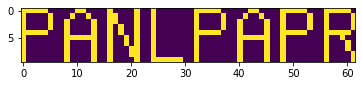

In [6]:
def draw(points):
    min_x = int(min(p.position.real for p in points))
    max_x = int(max(p.position.real for p in points))
    min_y = int(min(p.position.imag for p in points))
    max_y = int(max(p.position.imag for p in points))

    w, h = max_x-min_x+1, max_y-min_y+1
    grid = np.zeros((w, h), dtype=bool)
    for p in points:
        x, y = int(p.position.real), int(p.position.imag)
        grid[x-min_x, y-min_x] = True
    
    plt.imshow(grid.T)

draw(points)
    